In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import importlib
# Set Jupyter theme
jtplot.style(theme='grade3', context='paper', ticks=True, grid=False)

# Configure inline figure format
%config InlineBackend.figure_format = 'retina'

# Update matplotlib font settings

plt.rcParams.update({'font.size': 12,  # Adjust font size as needed
                     "mathtext.fontset": 'cm',
                     "text.usetex": False,
                     "axes.labelcolor":  "gray",
                     "axes.edgecolor":  "gray",
                     "axes.spines.left":   True,  # display axis spines
                     "axes.spines.bottom": True,
                     "axes.spines.top":    False,
                     "axes.spines.right":  False,
                     "xtick.color":       "gray",
                     "ytick.color":     "gray",
                     "xtick.major.size":       0,
                     "ytick.major.size":     0,
                     "xtick.major.pad":       5,
                     "ytick.major.pad":     5,
                     "legend.fancybox":      True,
                     "legend.labelcolor":  "gray",
                     })  # Set font family for math text

# If you are reloading modules, you may need to use importlib.reload()
# importlib.reload(module_name)

In [9]:
import src.markovchain
src.markovchain = importlib.reload(src.markovchain)
import src.mrp
src.mrp = importlib.reload(src.mrp)
import src.mdp
src.mdp = importlib.reload(src.mdp)
import src.tiny_mdps
src.tiny_mdps = importlib.reload(src.tiny_mdps)
mdps = []
mdp_eg_no = 0
for mdp_no in [mdp_eg_no]:
    mdp = src.tiny_mdps.load_example(mdp_no)
    mdps.append(mdp)
%matplotlib inline

In [14]:
initial_policy_list = ["random_uniform"]
initial_policy_labels_list = [ r'\text{random}']
Ts = [50, 50, 50]
nk_list = [5, 10]
k_list = [5, 10]
tau_list = [0., 1., 2.]
optimism_decay = 1.
n_seeds = 50

In [ ]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data
pmd = []
for tau_ind, tau in enumerate(tau_list):
    pmd_tau = []
    for k in k_list:
        sweep_params = {
            "seed": np.arange(n_seeds),
            "num_iter": [Ts[tau_ind]],
            "k": [k],
            "policy_improvement_type": ["PMD"],
            "tau_mean1": [0.],
            "tau_scale1": [tau],
            "save_logs": [True],
            "load_logs": [True],
            "experiment_name": ["inexact__controlled_mdp0"],
        }
        base_log_dir_inner = os.path.join(f"__tau_{tau}", f"__k_{k}")
        pmd_k = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params, base_log_dir=base_log_dir_inner)
        pmd_tau.append(pmd_k)
    pmd.append(pmd_tau)

In [ ]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data
lazy_momentum = []
for tau_ind, tau in enumerate(tau_list):
    base_log_dir_outer = f"__tau_{tau}"
    lazy_momentum_tau = []
    for nk in nk_list:
        lazy_momentum_k = []
        sweep_params = {
            "seed": np.arange(n_seeds),
            "num_iter": [Ts[tau_ind]],
            "k": [nk],
            "n": [0],
            "policy_improvement_type": ["PMD(+lazy_momentum)"],
            "tau_mean1": [0.],
            "tau_scale1": [tau],
            "optimism_decay": [optimism_decay],
            "save_logs": [True],
            "load_logs": [True],
            "experiment_name": ["inexact__controlled_mdp0"],
        }
        base_log_dir_inner = os.path.join(base_log_dir_outer, f"__nk_{nk}")
        lazy_momentum_nk = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params, base_log_dir=base_log_dir_inner)
        lazy_momentum_tau.append(lazy_momentum_nk)
    lazy_momentum.append(lazy_momentum_tau)
    # '/Users/ver/functional-acceleration/src/../logs/inexact__controlled/PMD(+lazy_momentum)/__tau_0.5/__nk_50/__mdp_0/__initial_policy_random_uniform/__seed_49/config.yaml'.

In [ ]:
from src import runner
# Reload the runner module if needed
runner = importlib.reload(runner)
# Initialize lists to store parameters, generators, and data
pi = []
for tau_ind, tau in enumerate(tau_list):
    sweep_params = {
        "seed": np.arange(n_seeds),
        "num_iter": [Ts[tau_ind]],
        "policy_improvement_type": ["PI"],
        "tau_mean1": [0.],
        "tau_scale1": [tau],
        "save_logs": [True],
        "load_logs": [True],
        "experiment_name": ["inexact__controlled_mdp0"],
    }
    base_log_dir = f"__tau_{tau}"
    pi_tau = runner.batch_run_alg(mdps, "initial_policy", initial_policy_list, "optimization", sweep_params, base_log_dir=base_log_dir)
    pi.append(pi_tau)

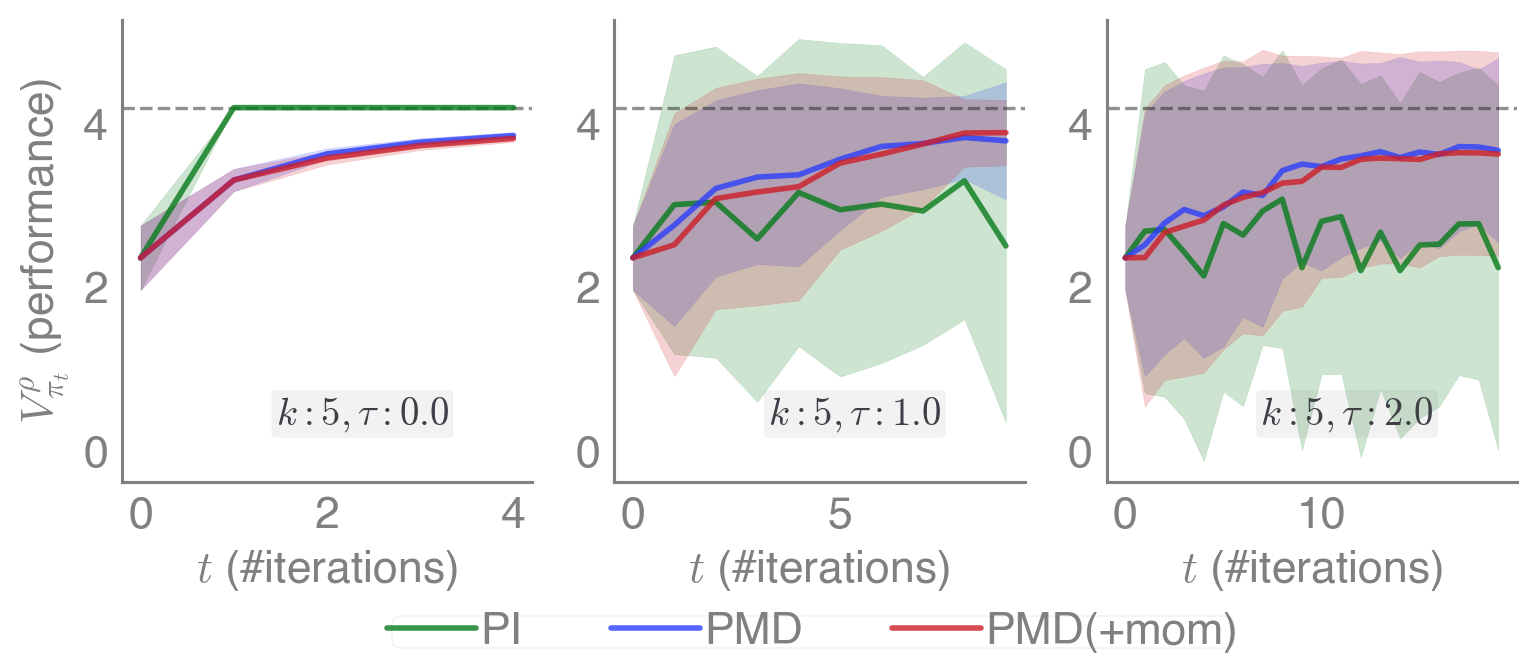

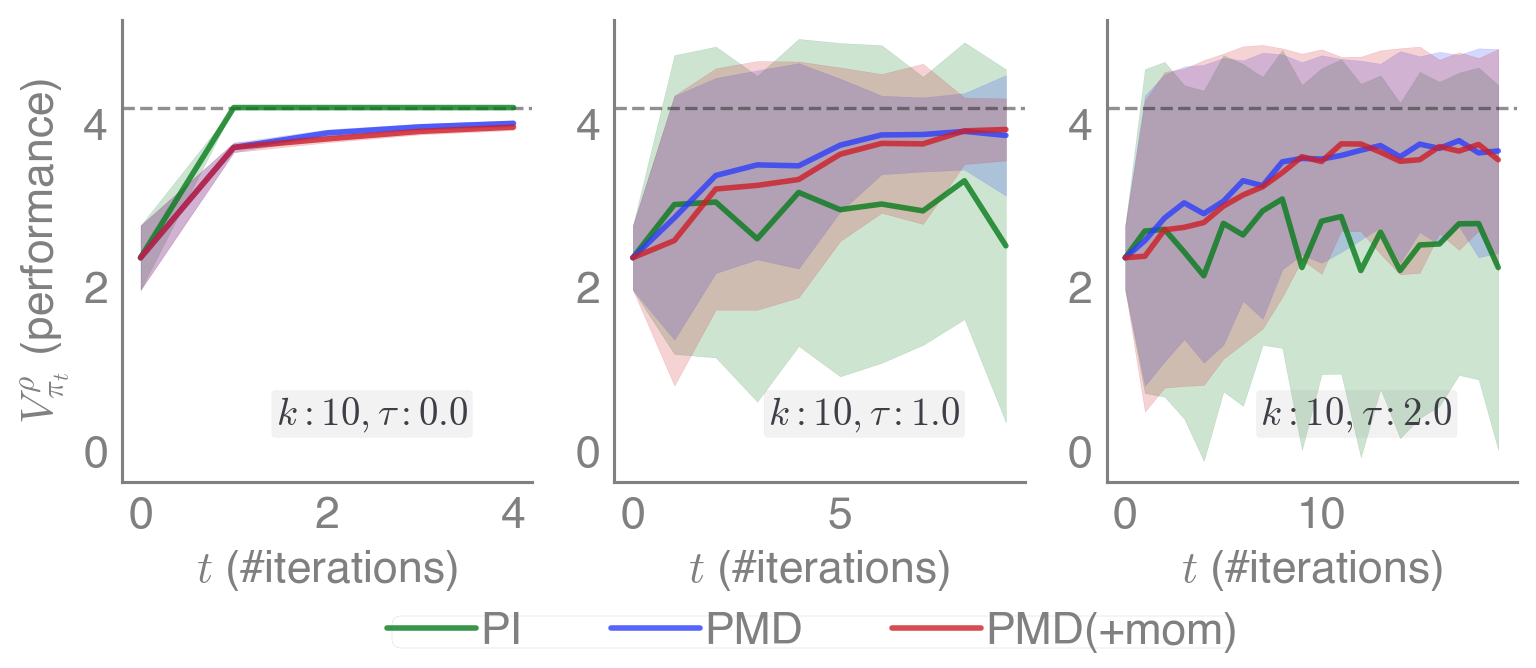

In [21]:
import src.plot_tiny_mdps

src.plot_tiny_mdps = importlib.reload(src.plot_tiny_mdps)
from src.plot_tiny_mdps import plot_learning_curves
import colormaps as cmaps
initial_policy = 0

newcmap3 = cmaps.WhiteGreen.shift(0.25).cut(0.25, "right").cut(0.25, "left")
newcmap2 = cmaps.cet_l_kbc_r.shift(0.25).cut(0.5, "right")
newcmap1 = cmaps.WhiteYellowOrangeRed.shift(0.25).cut(0.25, "right").cut(0.25, "left")

cmaps = [newcmap3, newcmap2, newcmap1]
data_list = []
labels_list = []
axline_data_list = []
mdp_no = 0
# Ts = [[5] * len(k_list), [10] * len(k_list),
#       [15] * len(k_list), [40] * len(k_list),
#       # [50] * len(k_list)]
Ts = [[5, 10, 20], [5, 10, 20]]
for kk, k in enumerate(k_list):
    data_list_tau = []
    labels_tau = []
    axline_data_tau = []
    for tau_ind, tau in enumerate(tau_list):
        data_list_tau.append([pi[tau_ind][2][mdp_no][initial_policy],
                      pmd[tau_ind][kk][2][mdp_no][initial_policy],
                      lazy_momentum[tau_ind][kk][2][mdp_no][initial_policy]])
        axline_data_tau.append(pmd[tau_ind][kk][1][mdp_no][initial_policy][0].v_star__rho)
        labels_tau.append([f"PI", f"PMD", f"PMD(+mom)"])
    data_list = [data_list_tau]
    labels_list = [labels_tau]
    axline_data_list = [axline_data_tau]
    figname=f"inexact_controlled_learning_curves_mdp{mdp_eg_no}_k:{k}"
    plot_learning_curves(data_list, labels_list, x_list=tau_list,axline_data_list=axline_data_list,
                         y_list=[k], n_seeds=n_seeds,cmaps=cmaps,
                         Ts=[Ts[kk]], legendsize=16,ticklabelsize=11,textsize=14,labelsize=16, legend_bbox=(1.5, -0.3),
                         savefig=True, figname=figname,
                         )
